<a href="https://colab.research.google.com/github/Fatimatic/machine-learning/blob/main/MultipleVariable_LinearRegression_Soln.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays

In [8]:
X_train = np.array([[2104, 5, 1, 45],[1416, 3, 2, 40],[852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

print(f' X_train= \n {X_train}')

print(f' y_train= {y_train}')

 X_train= 
 [[2104    5    1   45]
 [1416    3    2   40]
 [ 852    2    1   35]]
 y_train= [460 232 178]


In [15]:
 # Model Prediction With Multiple Variables through vectors
 def predict(x,w,b):
     p= np.dot(x,w)+b   # np.dot() is used to perform a vector dot product.
     return p

In [17]:
# get a row from our training data
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# Define initial values for w and b
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (4,), x_vec value: [2104    5    1   45]
f_wb shape (), prediction: 459.9999976194083


In [18]:
def compute_cost(X,y,w,b):
    m= X.shape[0]
    cost=0
    for i in range(m):
     f_wb= np.dot(X[i],w)+b
     cost+=(f_wb-y[i])**2
     cost=cost/(2*m)
     return cost

cost=compute_cost(X_train,y_train,w_init,b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 9.445361366440227e-13


In [9]:
# Compute Gradient with Multiple Variables
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

dj_db, dj_dw = compute_gradient(X_train, y_train, w_init, b_init)

print(f'dj_db at initial w,b: {dj_db}')
print(f'dj_dw at initial w,b: \n {dj_dw}')

dj_db at initial w,b: -1.6739251501955248e-06
dj_dw at initial w,b: 
 [-2.72623577e-03 -6.27197263e-06 -2.21745578e-06 -6.92403391e-05]


In [17]:
#Gradient Descent With Multiple Variables
import copy, math # Import copy and math here

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history=[]
    w=copy.deepcopy(w_in)
    b=b_in

    for i in range(num_iters):

        dj_db,dj_dw=gradient_function(X,y,w,b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db


        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing

In [18]:
# test the implementation of gradient descent
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-7

# Define the cost function (copied from cell dpBOGwCMnSlF)
def compute_cost(X,y,w,b):
    m= X.shape[0]
    cost=0
    for i in range(m):
     f_wb= np.dot(X[i],w)+b
     cost+=(f_wb-y[i])**2
     cost=cost/(2*m)
     return cost

# Compute Gradient with Multiple Variables (copied from cell Mlp-54v4rmKj)
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err

    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost   384.69   
Iteration  100: Cost   196.63   
Iteration  200: Cost   195.94   
Iteration  300: Cost   195.25   
Iteration  400: Cost   194.57   
Iteration  500: Cost   193.89   
Iteration  600: Cost   193.22   
Iteration  700: Cost   192.55   
Iteration  800: Cost   191.88   
Iteration  900: Cost   191.22   
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ] 
prediction: 426.19, target value: 460
prediction: 286.17, target value: 232
prediction: 171.47, target value: 178


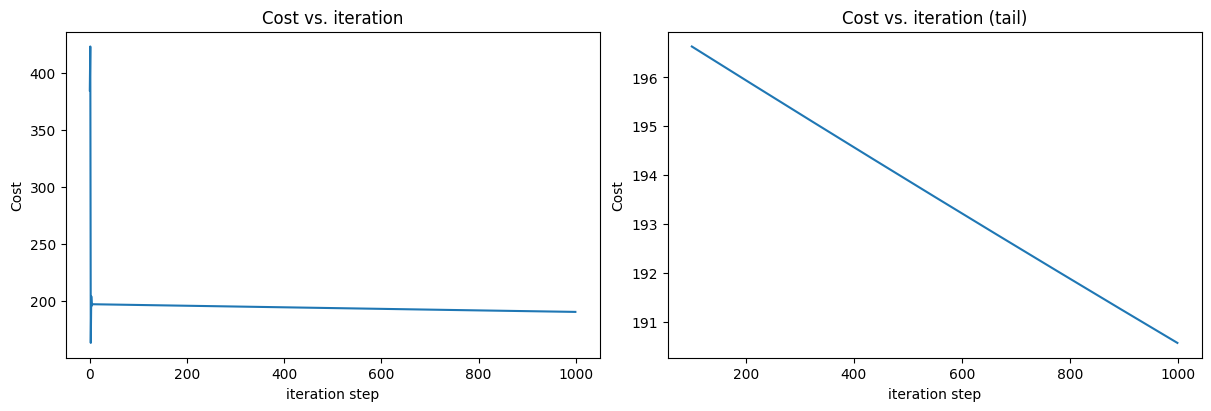

In [20]:
# plot cost versus iteration
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()